In [30]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df= pd.read_csv(r"C:\Datasets\Grid_Stability.csv")
df.sample(5)                

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
8675,8.890486,5.645561,3.155660,0.642751,2.427443,-0.629514,-0.942476,-0.855453,0.973431,0.889785,0.057963,0.504504,0.027116,unstable
4226,0.509928,1.790421,6.331719,1.518084,5.052228,-1.683956,-1.700754,-1.667518,0.799044,0.062329,0.628171,0.898306,-0.045465,stable
4335,5.116781,1.349771,7.083652,0.856951,4.007726,-1.651605,-1.438026,-0.918095,0.525354,0.517443,0.265501,0.720542,-0.050075,stable
58,4.985250,5.316307,2.623230,6.907926,3.540059,-0.542270,-1.849743,-1.148045,0.955232,0.161374,0.318092,0.953997,0.060267,unstable
8080,5.791831,8.807734,3.001974,8.224824,3.705504,-1.336670,-1.750091,-0.618743,0.166102,0.818971,0.168872,0.078901,0.006705,unstable


In [32]:
df.shape

(10000, 14)

In [33]:
df['stabf']=df['stabf'].replace(['unstable','stable'],['0','1'])

In [34]:
df.sample(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9675,0.508533,7.505413,9.537115,6.335474,3.841209,-0.751184,-1.688099,-1.401927,0.157118,0.967824,0.184285,0.342387,0.025070,0
3268,5.671346,2.910891,0.933075,5.402689,4.033685,-1.764620,-1.571622,-0.697443,0.218617,0.072572,0.329413,0.702260,-0.038307,1
4714,7.625085,7.447413,9.449057,1.837484,4.319625,-0.839069,-1.494933,-1.985623,0.782642,0.351340,0.764087,0.692477,0.044578,0
1802,3.783991,2.123360,0.561618,6.481342,4.216664,-1.120745,-1.119174,-1.976745,0.295335,0.384226,0.535711,0.760425,-0.022789,1
9729,8.866032,5.425236,6.565836,2.660482,3.310254,-1.126282,-1.119518,-1.064455,0.688851,0.563890,0.910219,0.627341,0.064781,0


In [35]:
#To view some basic Statistical Details

df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [36]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [37]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

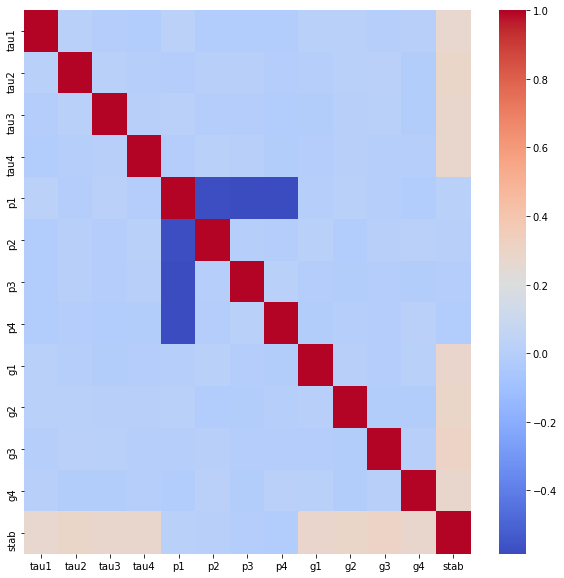

In [38]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [39]:
np.round(df.corr(),2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.00,0.02,-0.01,-0.02,0.03,-0.02,-0.02,-0.02,0.01,0.02,-0.00,0.01,0.28
tau2,0.02,1.00,0.01,-0.00,-0.00,0.01,0.01,-0.01,-0.00,0.02,0.02,-0.01,0.29
tau3,-0.01,0.01,1.00,0.00,0.02,-0.00,-0.01,-0.02,-0.01,0.01,0.01,-0.01,0.28
tau4,-0.02,-0.00,0.00,1.00,-0.00,0.01,0.01,-0.01,-0.00,0.01,0.00,-0.00,0.28
p1,0.03,-0.00,0.02,-0.00,1.00,-0.57,-0.58,-0.58,0.00,0.02,0.00,-0.02,0.01
p2,-0.02,0.01,-0.00,0.01,-0.57,1.00,0.00,-0.01,0.02,-0.02,0.01,0.02,0.01
p3,-0.02,0.01,-0.01,0.01,-0.58,0.00,1.00,0.01,-0.00,-0.01,-0.01,-0.01,-0.00
p4,-0.02,-0.01,-0.02,-0.01,-0.58,-0.01,0.01,1.00,-0.01,0.00,-0.00,0.02,-0.02
g1,0.01,-0.00,-0.01,-0.00,0.00,0.02,-0.00,-0.01,1.00,0.01,-0.01,0.01,0.28
g2,0.02,0.02,0.01,0.01,0.02,-0.02,-0.01,0.00,0.01,1.00,-0.01,-0.01,0.29


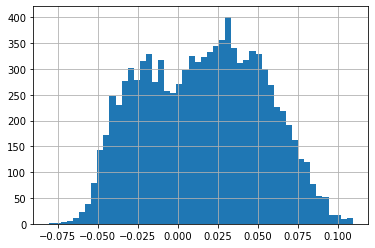

In [40]:

df['stab'].hist(bins=50)

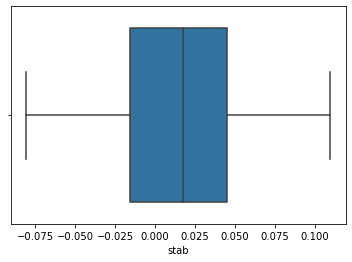

In [41]:
#Checking Outliers
sns.boxplot(df['stab'])
plt.show()

In [42]:
#Using Logistic Regression


from sklearn.linear_model import LogisticRegression
X=df.drop(['stabf'],axis=1)
Y=df['stabf']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

model=LogisticRegression(random_state=0,multi_class='ovr',solver='lbfgs')
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\Karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8985

In [49]:
from sklearn import svm 
svm_model = svm.SVC(kernel='rbf',C=30,gamma='auto')
svm_model.fit(X_train,y_train)
svm_model.score(X_test,y_test)

0.9515

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)

clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [54]:
df= pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.104053,0.127417,0.148404,0.013264,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9070,0.9075,0.9200,0.9160,0.9035,0.9108,0.006169,6
1,1.600343,0.164688,0.056424,0.001012,1,linear,"{'C': 1, 'kernel': 'linear'}",0.9520,0.9510,0.9605,0.9425,0.9400,0.9492,0.007325,3
2,0.946860,0.078042,0.081786,0.000624,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.9520,0.9500,0.9475,0.9525,0.9440,0.9492,0.003140,3
3,2.676391,0.336028,0.033315,0.003383,10,linear,"{'C': 10, 'kernel': 'linear'}",0.9890,0.9885,0.9925,0.9845,0.9830,0.9875,0.003391,2
4,1.227643,0.077278,0.079027,0.005226,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.9470,0.9535,0.9485,0.9515,0.9450,0.9491,0.003056,5
5,3.065803,0.125918,0.027961,0.001724,20,linear,"{'C': 20, 'kernel': 'linear'}",0.9925,0.9915,0.9945,0.9870,0.9895,0.9910,0.002569,1


In [56]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.9108
1,1,linear,0.9492
2,10,rbf,0.9492
3,10,linear,0.9875
4,20,rbf,0.9491
5,20,linear,0.9910


In [57]:
#To check the best model with best parameters

from sklearn.ensemble import RandomForestClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs',multi_class='ovr'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [59]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

,model,best_score,best_params
0,svm,0.9910,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.9997,{'n_estimators': 10}
2,logistic_regression,0.9721,{'C': 10}
